## Market Basket Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df3 = pd.read_csv("ecommerceData-Revised.csv",index_col=0)
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Hour,Month
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2020-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,12
1,536365,71053,WHITE METAL LANTERN,6,2020-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2020-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,12
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2020-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2020-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391183 entries, 0 to 541908
Data columns (total 11 columns):
InvoiceNo      391183 non-null int64
StockCode      391183 non-null int64
Description    391183 non-null object
Quantity       391183 non-null int64
InvoiceDate    391183 non-null object
UnitPrice      391183 non-null float64
CustomerID     391183 non-null int64
Country        391183 non-null object
TotalAmount    391183 non-null float64
Hour           391183 non-null int64
Month          391183 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 35.8+ MB


In [6]:
baskets = df3[df3['Country'] == 'France'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
baskets

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
basket_sets = baskets.applymap(encode_units)
basket_sets

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The following are useful concepts to know:

If X and Y are itemsets, X => Y is an association rule.

Support (X) = Number of transactions that contain X / Total number of transactions. Indicates how frequently an itemset appears in the database

Confidence (X => Y) = Support (X and Y) / Support (X). Indicates how often this rule has been found in the database

Lift (X => Y) = Support (X and Y) / Support (X) * Support (Y). Lift curve is similar to the ROC curve

A high conviction value means that the consequent is highly depending on the antecedent.

Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent.

Support(X^Y)-Support(X)* Support(Y)

In [8]:
frequent_itemsets = apriori(basket_sets, min_support = 0.07, use_colnames = True)
rules = association_rules(frequent_itemsets, metric='lift',min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.100264,0.105541,0.076517,0.763158,7.230921,0.065935,3.776605
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.105541,0.100264,0.076517,0.725000,7.230921,0.065935,3.271768
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.100264,0.097625,0.081794,0.815789,8.356330,0.072006,4.898605
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.097625,0.100264,0.081794,0.837838,8.356330,0.072006,5.548373
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.097625,0.105541,0.076517,0.783784,7.426351,0.066214,4.136873


In [9]:
rules.shape

(32, 9)

In [10]:
frequent_itemsets.head(20)

,support,itemsets
0,0.073879,(4 TRADITIONAL SPINNING TOPS)
1,0.100264,(ALARM CLOCK BAKELIKE GREEN)
2,0.105541,(ALARM CLOCK BAKELIKE PINK)
3,0.097625,(ALARM CLOCK BAKELIKE RED )
4,0.071240,(ASSORTED COLOUR MINI CASES)
5,0.079156,(BAKING SET 9 PIECE RETROSPOT )
6,0.071240,(CHARLOTTE BAG APPLES DESIGN)
7,0.073879,(CHILDRENS CUTLERY DOLLY GIRL )
8,0.071240,(CHILDRENS CUTLERY SPACEBOY )
9,0.071240,(CIRCUS PARADE LUNCH BOX )


In [11]:
frequent_itemsets.shape

(61, 2)

In [12]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.100264,0.105541,0.076517,0.763158,7.230921,0.065935,3.776605
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.105541,0.100264,0.076517,0.725000,7.230921,0.065935,3.271768
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.100264,0.097625,0.081794,0.815789,8.356330,0.072006,4.898605
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.097625,0.100264,0.081794,0.837838,8.356330,0.072006,5.548373
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.097625,0.105541,0.076517,0.783784,7.426351,0.066214,4.136873
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.105541,0.097625,0.076517,0.725000,7.426351,0.066214,3.281362
6,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.102902,0.129288,0.073879,0.717949,5.553114,0.060575,3.087071
7,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.129288,0.102902,0.073879,0.571429,5.553114,0.060575,2.093228
8,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN SPACEBOY),0.174142,0.139842,0.092348,0.530303,3.792167,0.067996,1.831305
9,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE ),0.139842,0.174142,0.092348,0.660377,3.792167,0.067996,2.431692


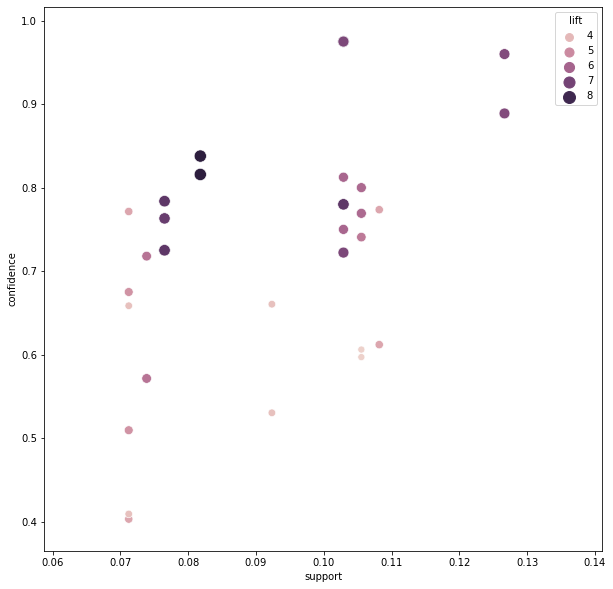

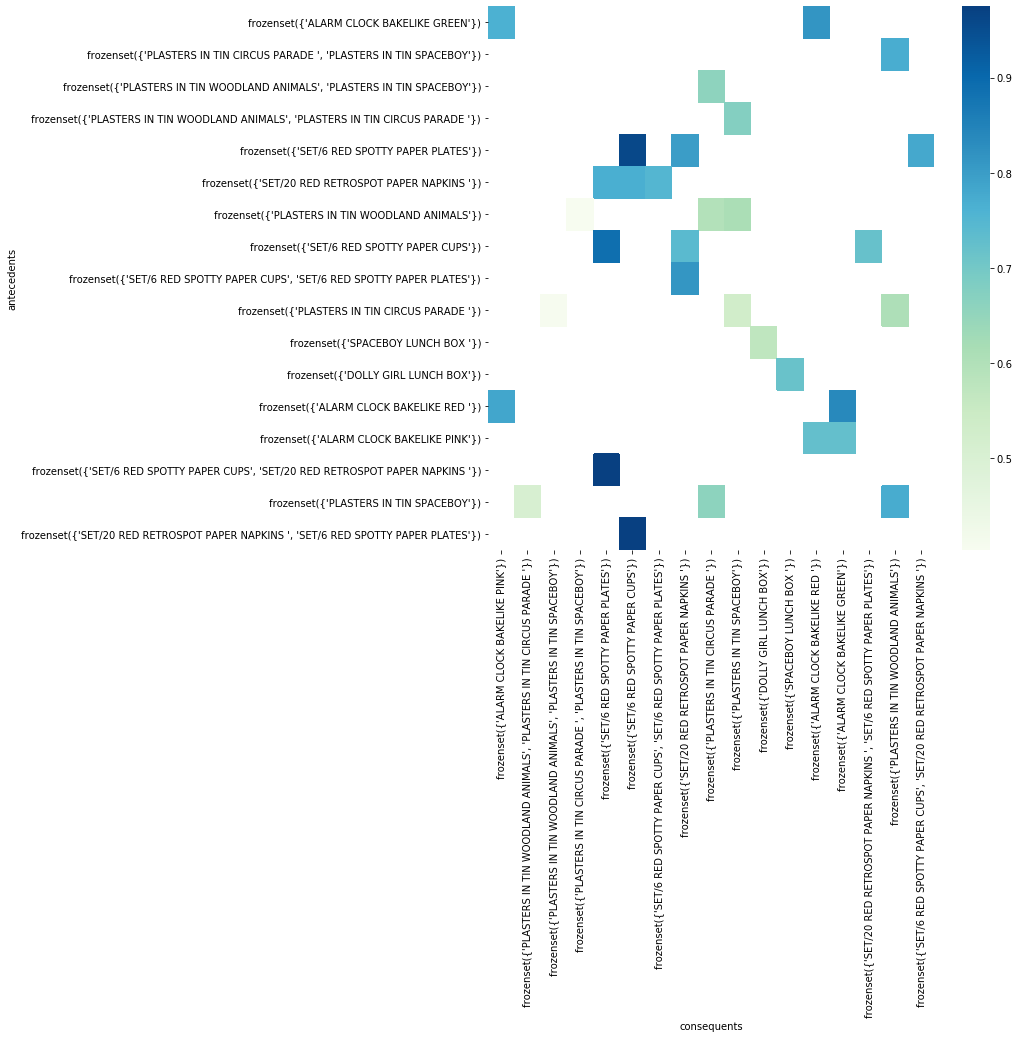

In [13]:
def plot_association_rules(arm):
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    sns.scatterplot(arm.support, arm.confidence,hue=arm.lift, size=arm.lift, ax=ax,sizes = (50,150))
    
    fig1,ax1=plt.subplots(1,1,figsize=(10,10))
    arm_heat = arm.pivot(index='antecedents', columns='consequents', values='confidence')
    sns.heatmap(arm_heat,ax=ax1,cmap='GnBu')
    
plot_association_rules(rules)

In [14]:
import networkx as nx

In [15]:
def build_plot_graph(garm):
    G = nx.Graph()
    G.add_nodes_from(garm.antecedents)
    for index, row in garm.iterrows():
        G.add_edge(row.antecedents, row.consequents)
        G[row.antecedents][row.consequents]['support'] = row.support
        G[row.antecedents][row.consequents]['lift'] = row.lift
        G[row.antecedents][row.consequents]['confidence'] = row.confidence
        
    fig,ax = plt.subplots(1,1,figsize=(50,50))
    edges = G.edges()
    widths = [G[u][v]['confidence']*10 for u,v in edges]
    nx.draw(G, pos=nx.spring_layout(G, seed=0), width=widths, with_labels=True)


In [16]:
rules[(rules.confidence > 0.1) & (rules.lift > 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.100264,0.105541,0.076517,0.763158,7.230921,0.065935,3.776605
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.105541,0.100264,0.076517,0.725000,7.230921,0.065935,3.271768
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.100264,0.097625,0.081794,0.815789,8.356330,0.072006,4.898605
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.097625,0.100264,0.081794,0.837838,8.356330,0.072006,5.548373
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.097625,0.105541,0.076517,0.783784,7.426351,0.066214,4.136873
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.105541,0.097625,0.076517,0.725000,7.426351,0.066214,3.281362
6,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.102902,0.129288,0.073879,0.717949,5.553114,0.060575,3.087071
7,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.129288,0.102902,0.073879,0.571429,5.553114,0.060575,2.093228
8,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN SPACEBOY),0.174142,0.139842,0.092348,0.530303,3.792167,0.067996,1.831305
9,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE ),0.139842,0.174142,0.092348,0.660377,3.792167,0.067996,2.431692


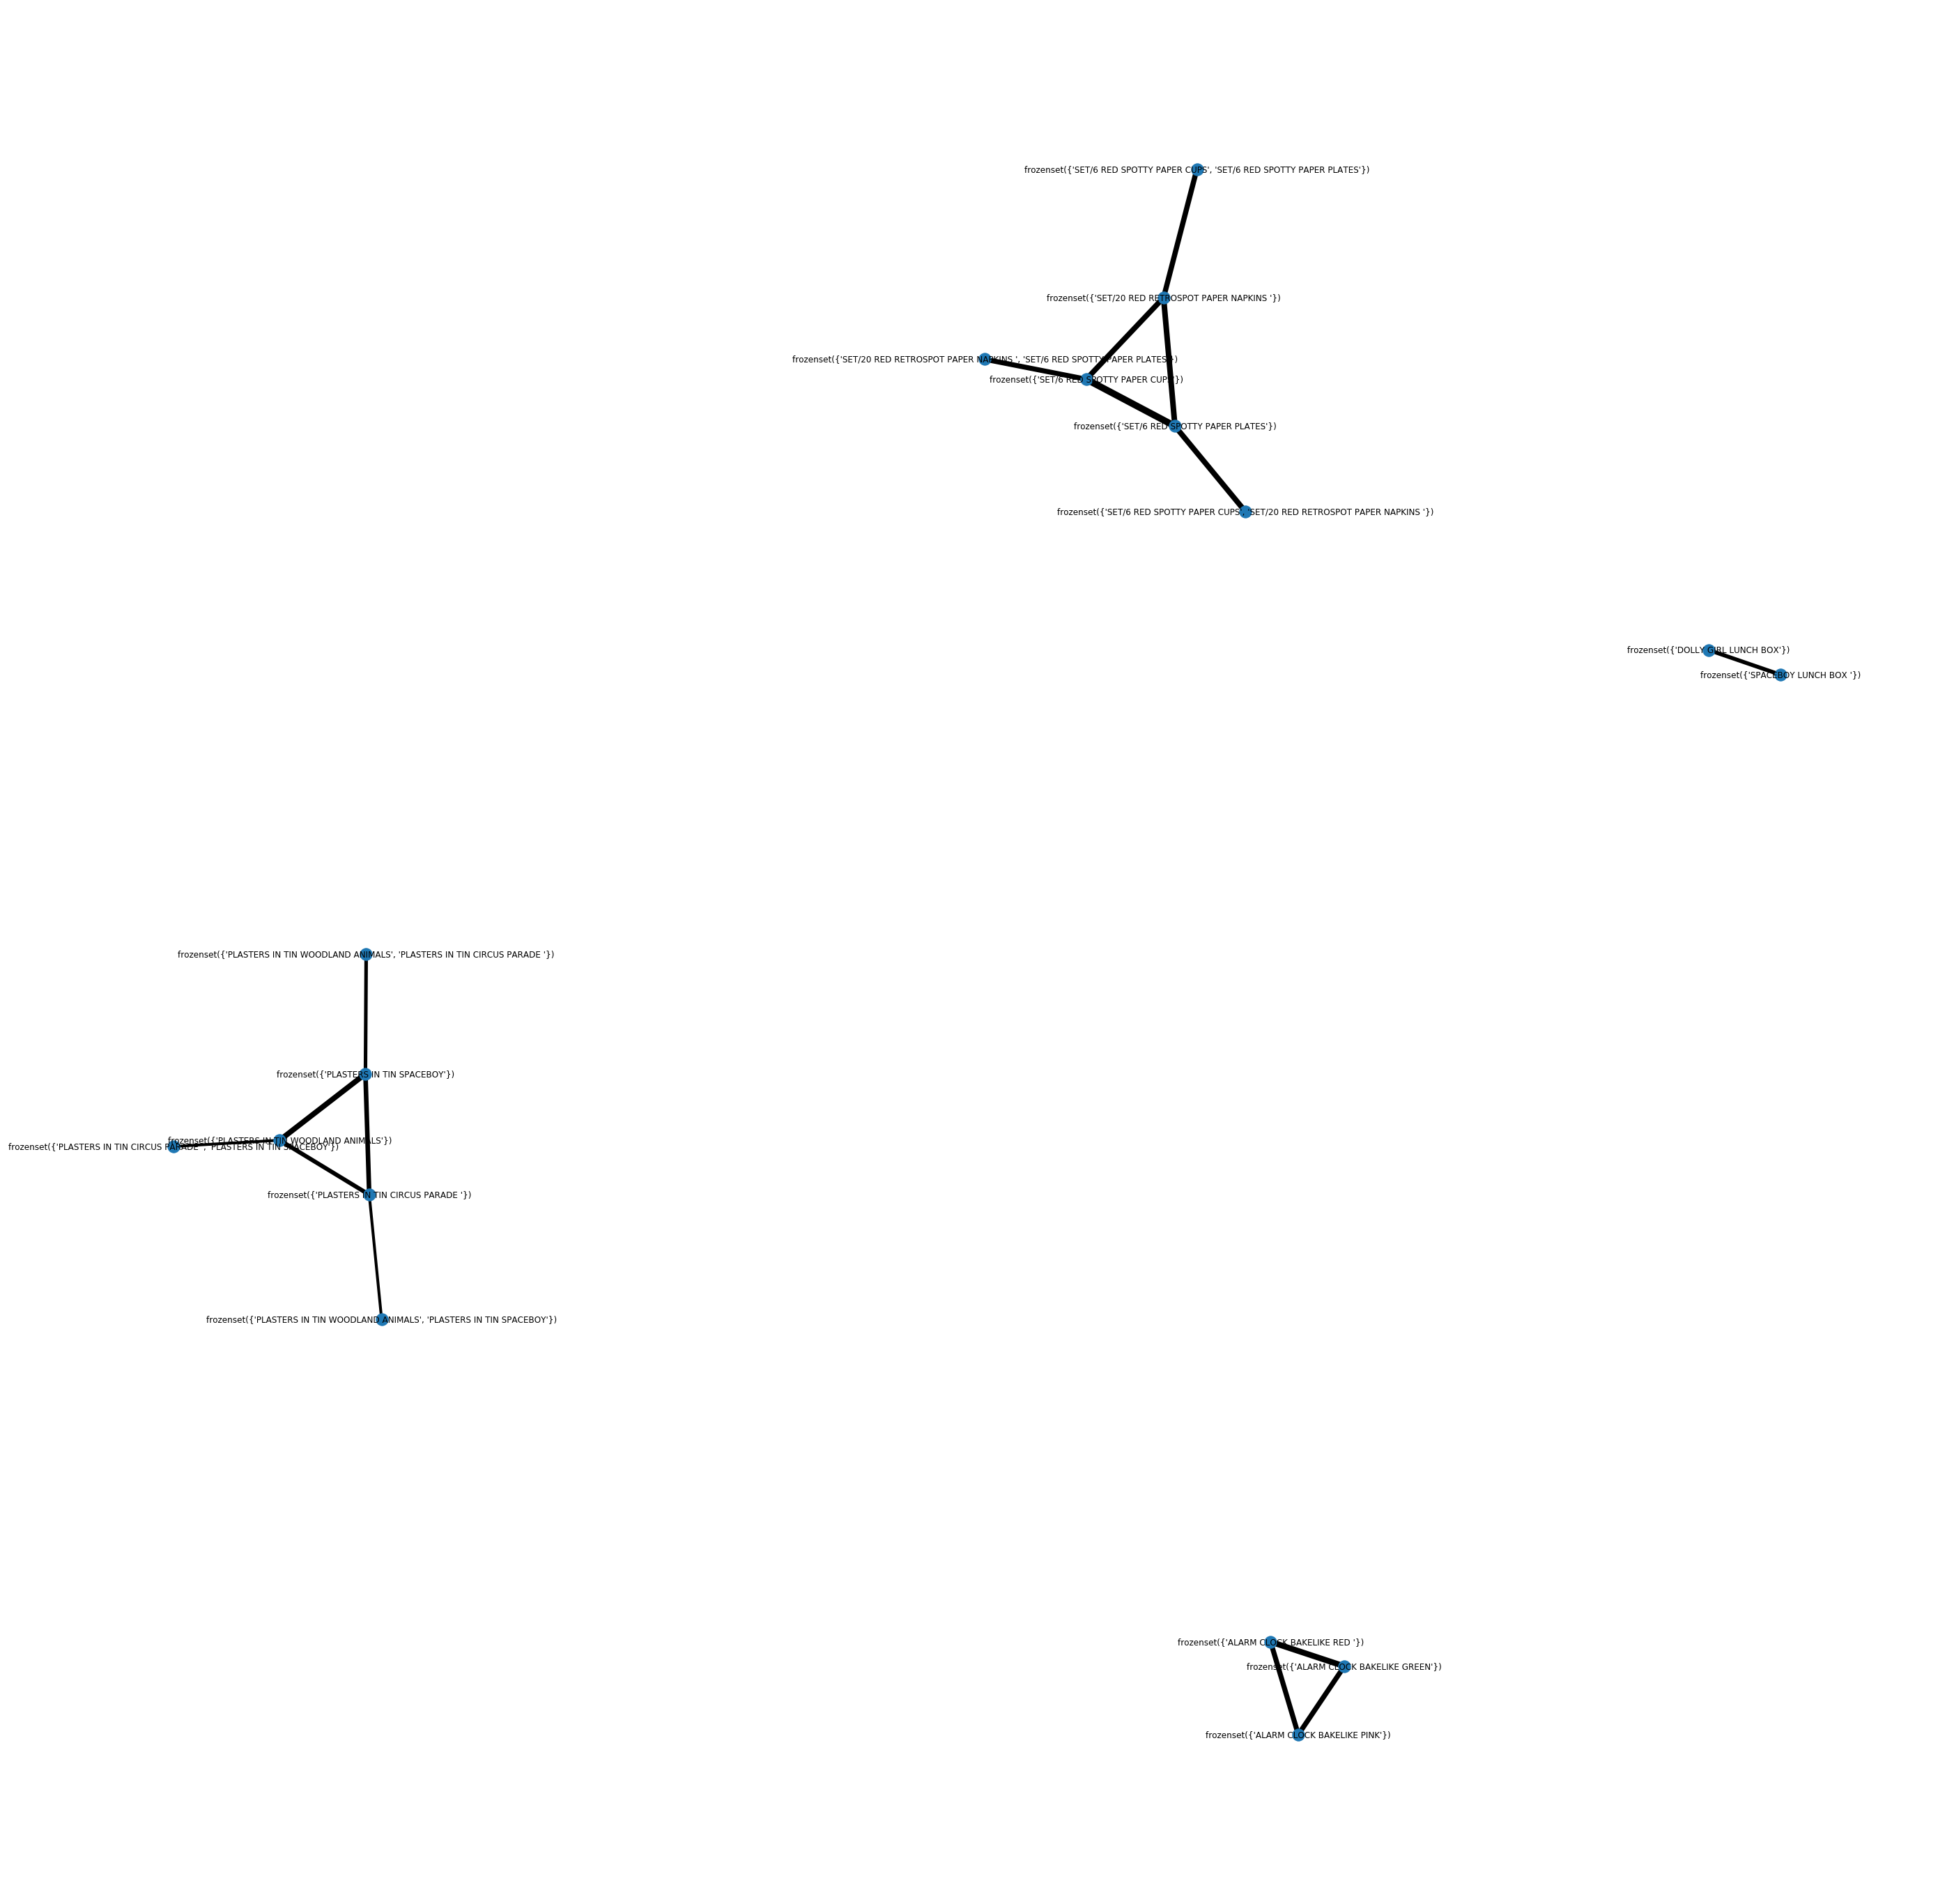

In [17]:
build_plot_graph(rules[(rules.confidence > 0.1) & (rules.lift > 1)])